<a href="https://colab.research.google.com/github/challaanusha46/ML_UniControl/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

def calculate_mse(image_a, image_b):
    # The Mean Squared Error between the two images will be calculated
    err = np.sum((image_a.astype("float") - image_b.astype("float")) ** 2)
    err /= float(image_a.shape[0] * image_a.shape[1])
    return err

def calculate_psnr(image_a, image_b):
    # The Peak Signal-to-Noise Ratio between the two images will be calculated
    mse = calculate_mse(image_a, image_b)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# Read the original and noisy images
original_image_path = '/content/Original.png'
noisy_image_path = '/content/Nerveimage.png'
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = cv2.imread(noisy_image_path, cv2.IMREAD_GRAYSCALE)

# Check if images are of the same dimensions
if original_image.shape != noisy_image.shape:
    print("Resizing the noisy image to match the original image...")
    noisy_image = cv2.resize(noisy_image, (original_image.shape[1], original_image.shape[0]))

# Compute MSE and PSNR
mse_value = calculate_mse(original_image, noisy_image)
psnr_value = calculate_psnr(original_image, noisy_image)

print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value}")


Resizing the noisy image to match the original image...
MSE: 6086.97021484375
PSNR: 10.286791842275438


In [ ]:
import cv2
import numpy as np

def mse(imageA, imageB):
    # Compute the mean squared error between the two images
    err = np.mean((imageA - imageB) ** 2)
    return err

def psnr(imageA, imageB):
    # Assume the pixel values range from 0 to 255
    mse_value = mse(imageA, imageB)
    if mse_value == 0:  # Prevent division by zero
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def snr(imageA, imageB):
    # Compute the mean signal power and noise power
    signal_power = np.mean(imageA ** 2)
    noise_power = np.mean((imageA - imageB) ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Load two images
image1 = cv2.imread('/content/Nerveimage.png')
image2 = cv2.imread('/content/Original.png')

# Resize both images to the smallest dimension of either image
height = min(image1.shape[0], image2.shape[0])
width = min(image1.shape[1], image2.shape[1])

image1_resized = cv2.resize(image1, (width, height))
image2_resized = cv2.resize(image2, (width, height))

# Convert images to grayscale
image1_gray = cv2.cvtColor(image1_resized, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2_resized, cv2.COLOR_BGR2GRAY)

# Calculate MSE, PSNR, and SNR
mse_value = mse(image1_gray, image2_gray)
psnr_value = psnr(image1_gray, image2_gray)
snr_value = snr(image1_gray, image2_gray)

print("MSE:", mse_value)
print("PSNR:", psnr_value)
print("SNR:", snr_value)


MSE: 104.32434430803572
PSNR: 27.946946970724387
SNR: 0.1537312229768763


In [13]:
import cv2
import numpy as np

def calculate_mse(imageA, imageB):
    # Compute the mean squared error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def calculate_psnr(imageA, imageB):
    # Calculate MSE first
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # If no noise, PSNR is infinite
    # Assuming the pixel values range from 0 to 255
    return 20 * np.log10(255.0 / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    # Calculate signal power and noise power
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def resize_images(imageA, imageB):
    # Resize both images to the size of the smaller image
    hA, wA = imageA.shape[:2]
    hB, wB = imageB.shape[:2]
    new_height = min(hA, hB)
    new_width = min(wA, wB)
    resizedA = cv2.resize(imageA, (new_width, new_height))
    resizedB = cv2.resize(imageB, (new_width, new_height))
    return resizedA, resizedB

# Load two images: original and generated
original = cv2.imread('/content/Generated3.png')
generated = cv2.imread('/content/Nerveimage.png')

# Convert images to grayscale if they are not
if len(original.shape) == 3:
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
if len(generated.shape) == 3:
    generated = cv2.cvtColor(generated, cv2.COLOR_BGR2GRAY)

# Resize images to the same dimensions
original_resized, generated_resized = resize_images(original, generated)

# Calculate MSE, PSNR, and SNR
mse_value = calculate_mse(original_resized, generated_resized)
psnr_value = calculate_psnr(original_resized, generated_resized)
snr_value = calculate_snr(original_resized.astype("float"), generated_resized.astype("float"))

print("MSE:", mse_value)
print("PSNR:", psnr_value)
print("SNR:", snr_value)


MSE: 5734.145345052083
PSNR: 10.546116639292109
SNR: 4.308647012455368


In [17]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=255.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:  # means no noise is present in the signal
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def dice_similarity_coefficient(true_mask, pred_mask):
    intersection = np.sum(true_mask * pred_mask)
    return (2. * intersection) / (np.sum(true_mask) + np.sum(pred_mask))

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)  # Resize to the target size
    image = image.astype(np.float32) / 255.0  # Normalize to [0, 1]
    return image

# Use the updated preprocess function to ensure both images are the same size
original_size = (512, 512)  # Set this to the desired size
original = preprocess(original_image_path, target_size=original_size)
generated = preprocess(generated_image_path, target_size=original_size)

# Continue with the rest of your code to compute the metrics...

# Load and preprocess the images
original_image_path = '/content/Nerveimage.png'
generated_image_path = '/content/Generated3.png'
original = preprocess(original_image_path)
generated = preprocess(generated_image_path)

# Calculate the quality metrics
mse_value = calculate_mse(original, generated)
psnr_value = calculate_psnr(original, generated)
snr_value = calculate_snr(original, generated)
ssim_value = ssim(original, generated)

# If segmentation masks are available:
# true_segmentation_mask = preprocess('path_to_true_segmentation_mask.png')
# predicted_segmentation_mask = preprocess('path_to_predicted_segmentation_mask.png')
# dsc_value = dice_similarity_coefficient(true_segmentation_mask, predicted_segmentation_mask)
# Uncomment above lines and provide the actual paths to the segmentation masks if you have them.

# Print out the metrics
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value}")
print(f"SNR: {snr_value}")
print(f"SSIM: {ssim_value}")
# print(f"DSC: {dsc_value}")  # Uncomment if segmentation masks are being used


MSE: 0.09176015853881836
PSNR: 58.504262199292015
SNR: 3.165760040283203
SSIM: 0.15671131035854596


In [18]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=255.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:  # means no noise is present in the signal
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def dice_similarity_coefficient(true_mask, pred_mask):
    intersection = np.sum(true_mask * pred_mask)
    return (2. * intersection) / (np.sum(true_mask) + np.sum(pred_mask))

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)  # Resize to the target size
    image = image.astype(np.float32) / 255.0  # Normalize to [0, 1]
    return image

# Load and preprocess the images
original_image_path = '/content/Nerveimage.png'
generated_image_path = '/content/Generated.png'
original_size = (512, 512)  # Set this to the desired size

original = preprocess(original_image_path, target_size=original_size)
generated = preprocess(generated_image_path, target_size=original_size)

# Calculate the quality metrics
mse_value = calculate_mse(original, generated)
psnr_value = calculate_psnr(original, generated)
snr_value = calculate_snr(original, generated)
ssim_value = ssim(original, generated)

# If segmentation masks are available:
# true_segmentation_mask = preprocess('path_to_true_segmentation_mask.png', target_size=original_size)
# predicted_segmentation_mask = preprocess('path_to_predicted_segmentation_mask.png', target_size=original_size)
# dsc_value = dice_similarity_coefficient(true_segmentation_mask, predicted_segmentation_mask)
# Uncomment above lines and provide the actual paths to the segmentation masks if you have them.

# Print out the metrics
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value}")
print(f"SNR: {snr_value}")
print(f"SSIM: {ssim_value}")
# print(f"DSC: {dsc_value}")  # Uncomment if segmentation masks are being used


MSE: 0.09176015853881836
PSNR: 58.504262199292015
SNR: 3.165760040283203
SSIM: 0.15671131035854596


In [20]:
pip install jsonlines

In [24]:
import jsonlines

# Define the base structure of the data
base_data = {
    "source": "",
    "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image"
}

# Open a jsonlines file to write the entries
with jsonlines.open("output.jsonl", mode='w') as writer:
    for i in range(1, 201):
        # Update the control_blur value for each entry
        data = base_data.copy()
        data["control_blur"] = f"blur/{i}.tif"

        # Write the data to the jsonlines file
        writer.write(data)
        print(data)
print("JSONLines file created with 200 entries.")



{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/1.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/2.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/3.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/4.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/5.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/6.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/7.tif'}
{'source': '', 'prompt': 'a collection of Brachial Plexus(BP) nerves in the ultrasound image', 'control_blur': 'blur/8.tif'}


In [27]:
import jsonlines
import json
# Define the base structure of the data
base_data = {
    "source": "",
    "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image"
}

# Open a jsonlines file to write the entries
with jsonlines.open("output.jsonl", mode='w') as writer:
    for i in range(1, 201):
        # Update the control_blur value for each entry
        data = base_data.copy()
        data["control_blur"] = f"blur/{i}.tif"

        # Write the data to the jsonlines file and print it
        writer.write(data)
        print(json.dumps(data))  # This will ensure the output is in the exact JSON format with double quotes

print("JSONLines file created with 200 entries.")


{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/1.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/2.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/3.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/4.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/5.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/6.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/7.tif"}
{"source": "", "prompt": "a collection of Brachial Plexus(BP) nerves in the ultrasound image", "control_blur": "blur/8.tif"}


In [10]:
from google.colab import files
uploaded = files.upload()

Saving Generated3.png to Generated3.png
Saving Generated1.png to Generated1.png


In [8]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Define your metric calculation functions
def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=255.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0
    return image

# Placeholder paths to your images
original_image_paths = [f'content/sample_data/Org/1.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-xxxx{i}.png' for i in range(1, 201)]

# Make sure both lists have the same number of paths
assert len(original_image_paths) == len(generated_image_paths) == 200

# Lists to hold metric values for all image pairs
mse_values = []
ssim_values = []
psnr_values = []
snr_values = []

# Process each image pair
for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    # Calculate all metrics
    mse = calculate_mse(original, generated)
    psnr = calculate_psnr(original, generated)
    snr = calculate_snr(original, generated)
    ssim_index = ssim(original, generated)

    # Append results to the lists
    mse_values.append(mse)
    ssim_values.append(ssim_index)
    psnr_values.append(psnr)
    snr_values.append(snr)

# Plotting the results
plt.figure(figsize=(15, 10))

# MSE plot
plt.subplot(2, 2, 1)
plt.scatter(range(1, 201), mse_values, color='red', label='MSE')
plt.title('MSE for 200 Image Pairs')
plt.xlabel('Image Pair Index')
plt.ylabel('MSE Value')

# SSIM plot
plt.subplot(2, 2, 2)
plt.scatter(range(1, 201), ssim_values, color='blue', label='SSIM')
plt.title('SSIM for 200 Image Pairs')
plt.xlabel('Image Pair Index')
plt.ylabel('SSIM Value')

# PSNR plot
plt.subplot(2, 2, 3)
plt.scatter(range(1, 201), psnr_values, color='green', label='PSNR')
plt.title('PSNR for 200 Image Pairs')
plt.xlabel('Image Pair Index')
plt.ylabel('PSNR Value')

# SNR plot
plt.subplot(2, 2, 4)
plt.scatter(range(1, 201), snr_values, color='purple', label='SNR')
plt.title('SNR for 200 Image Pairs')
plt.xlabel('Image Pair Index')
plt.ylabel('SNR Value')

plt.tight_layout()
plt.show()


ValueError: Image not found at content/sample_data/Org/1.tif

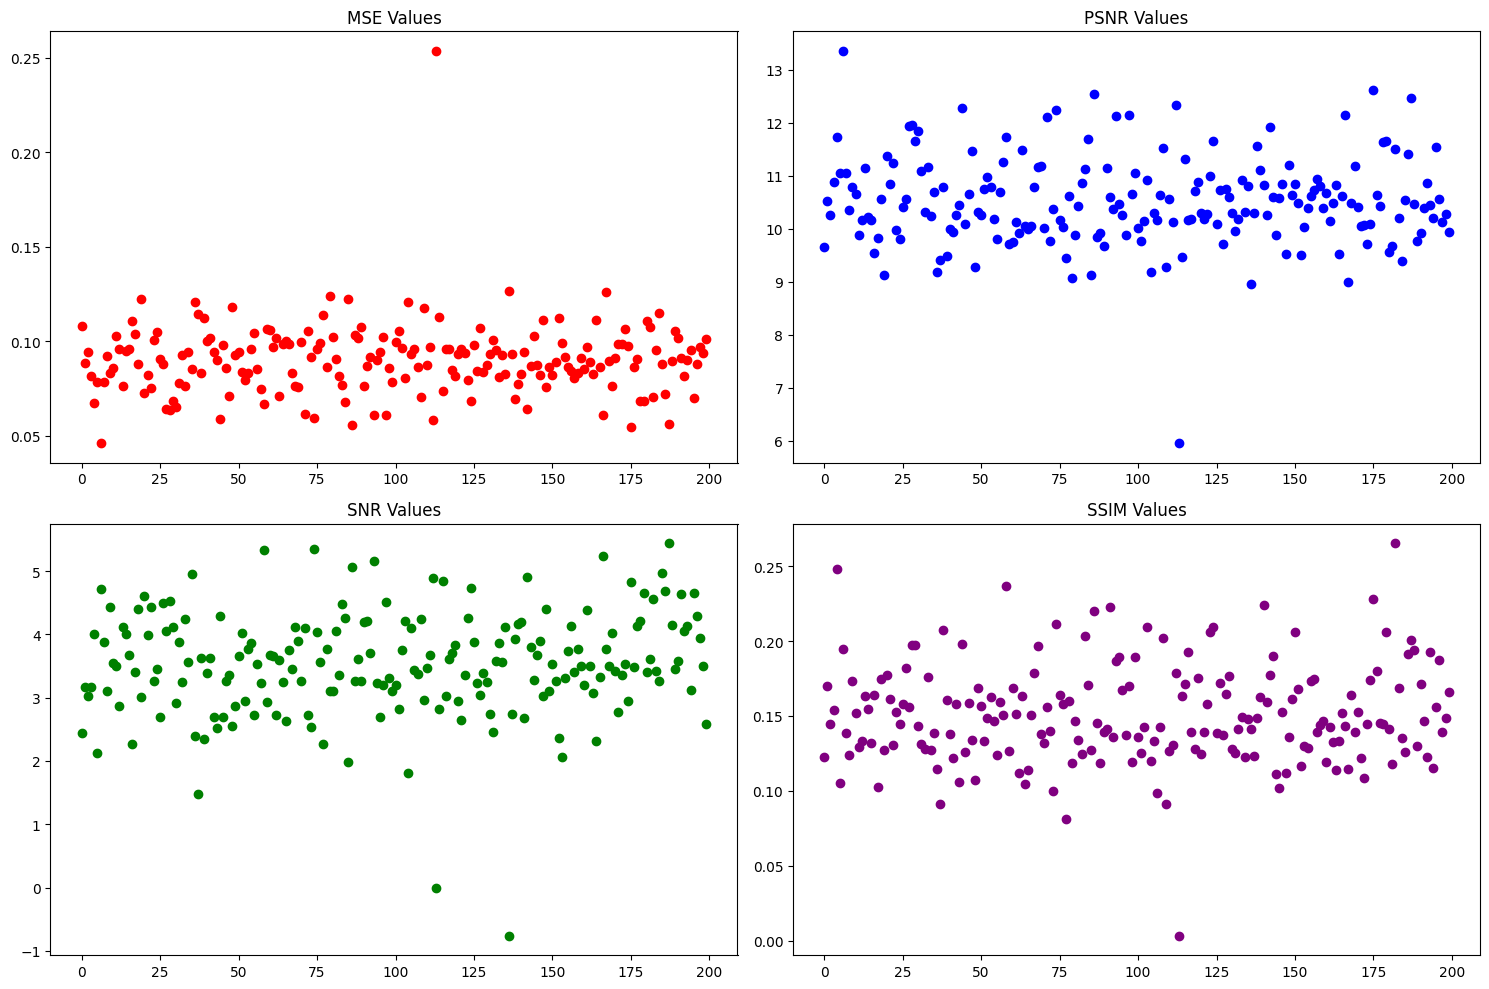

In [13]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_mse(imageA, imageB):
    # Calculate Mean Squared Error between two images
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    # Calculate Peak Signal-to-Noise Ratio
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    # Calculate Signal-to-Noise Ratio
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Convert image to grayscale if it has three channels
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the image
    image = image.astype(np.float32) / 255.0

    return image
# Assuming original images are .tif and generated are in a specific .png format
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 200)]

# Metric storage
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

# Process each image pair
for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    # Append metrics to lists
    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Plotting the metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].scatter(range(200), mse_values, color='red')
axs[0, 0].set_title('MSE Values')
axs[0, 1].scatter(range(200), psnr_values, color='blue')
axs[0, 1].set_title('PSNR Values')
axs[1, 0].scatter(range(200), snr_values, color='green')
axs[1, 0].set_title('SNR Values')
axs[1, 1].scatter(range(200), ssim_values, color='purple')
axs[1, 1].set_title('SSIM Values')
plt.tight_layout()
plt.show()

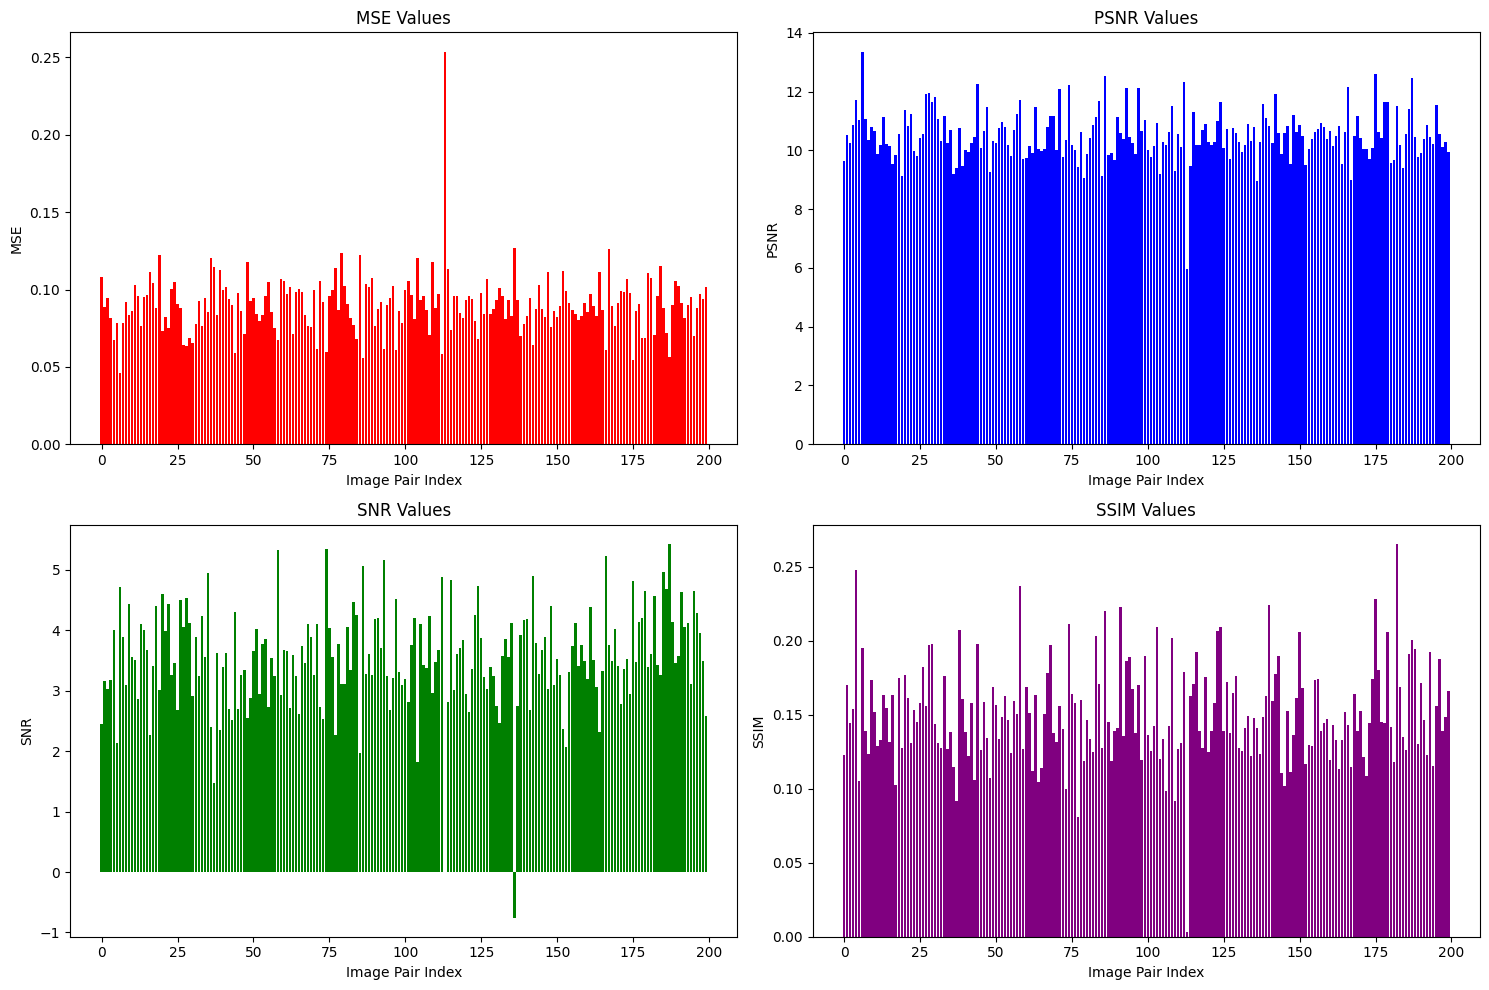

In [14]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_mse(imageA, imageB):
    # Calculate Mean Squared Error between two images
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    # Calculate Peak Signal-to-Noise Ratio
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    # Calculate Signal-to-Noise Ratio
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Convert image to grayscale if it has three channels
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the image
    image = image.astype(np.float32) / 255.0

    return image
# Assuming original images are .tif and generated are in a specific .png format
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]
# Metric storage
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

# Process each image pair
for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Plotting the metrics using bar graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
x = np.arange(len(mse_values))  # the label locations

axs[0, 0].bar(x, mse_values, color='red')
axs[0, 0].set_title('MSE Values')
axs[0, 0].set_xlabel('Image Pair Index')
axs[0, 0].set_ylabel('MSE')

axs[0, 1].bar(x, psnr_values, color='blue')
axs[0, 1].set_title('PSNR Values')
axs[0, 1].set_xlabel('Image Pair Index')
axs[0, 1].set_ylabel('PSNR')

axs[1, 0].bar(x, snr_values, color='green')
axs[1, 0].set_title('SNR Values')
axs[1, 0].set_xlabel('Image Pair Index')
axs[1, 0].set_ylabel('SNR')

axs[1, 1].bar(x, ssim_values, color='purple')
axs[1, 1].set_title('SSIM Values')
axs[1, 1].set_xlabel('Image Pair Index')
axs[1, 1].set_ylabel('SSIM')

plt.tight_layout()
plt.show()


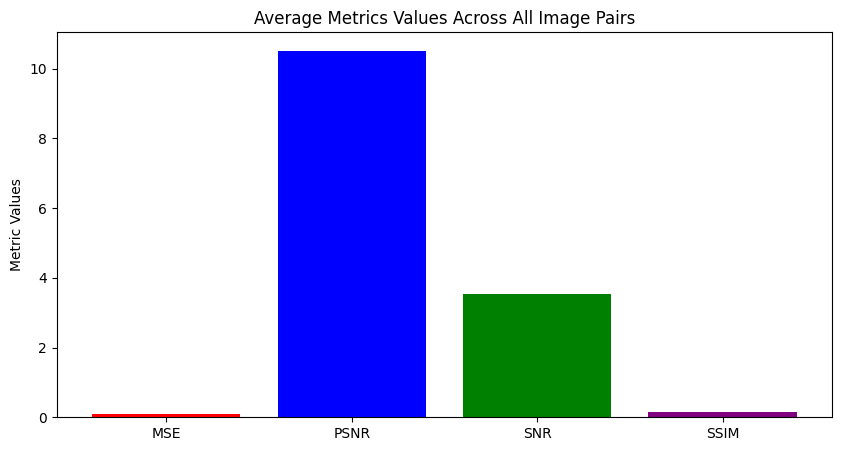

In [2]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_mse(imageA, imageB):
    # Calculate Mean Squared Error between two images
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    # Calculate Peak Signal-to-Noise Ratio
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    # Calculate Signal-to-Noise Ratio
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Convert image to grayscale if it has three channels
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the image
    image = image.astype(np.float32) / 255.0

    return image
    # Assuming original images are .tif and generated are in a specific .png format
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]
# Metric storage
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

# Process each image pair
for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Calculate averages of metrics
average_mse = np.mean(mse_values)
average_psnr = np.mean(psnr_values)
average_snr = np.mean(snr_values)
average_ssim = np.mean(ssim_values)

# Metrics for bar plot
metrics = [average_mse, average_psnr, average_snr, average_ssim]
metric_labels = ['MSE', 'PSNR', 'SNR', 'SSIM']
colors = ['red', 'blue', 'green', 'purple']

# Creating a bar graph with average values
plt.figure(figsize=(10, 5))
plt.bar(metric_labels, metrics, color=colors)
plt.title('Average Metrics Values Across All Image Pairs')
plt.ylabel('Metric Values')
plt.show()

In [5]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import plotly.graph_objects as go

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    image = cv2.resize(image, target_size)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = image.astype(np.float32) / 255.0
    return image

# Paths to images, adjust ranges if necessary to match file count
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]

mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Calculate averages
average_metrics = {
    'PSNR': np.mean(psnr_values),
    'MSE': np.mean(mse_values),
    'SNR': np.mean(snr_values),
    'SSIM': np.mean(ssim_values)
}

# Create Plotly bar graph
fig = go.Figure(data=[
    go.Bar(
        x=list(average_metrics.keys()),
        y=list(average_metrics.values()),
        marker_color=['blueviolet', 'orange', 'lightblue', 'purple']
    )
])

fig.update_layout(
    title='Average Metrics Values Across All Image Pairs',
    xaxis_title='Metrics',
    yaxis_title='Average Values',
    paper_bgcolor='rgba(0,0,0,0)',  # transparent background
    plot_bgcolor='rgba(0,0,0,0)'  # transparent background
)

fig.show()


Number of original image paths: 200
Number of generated image paths: 200


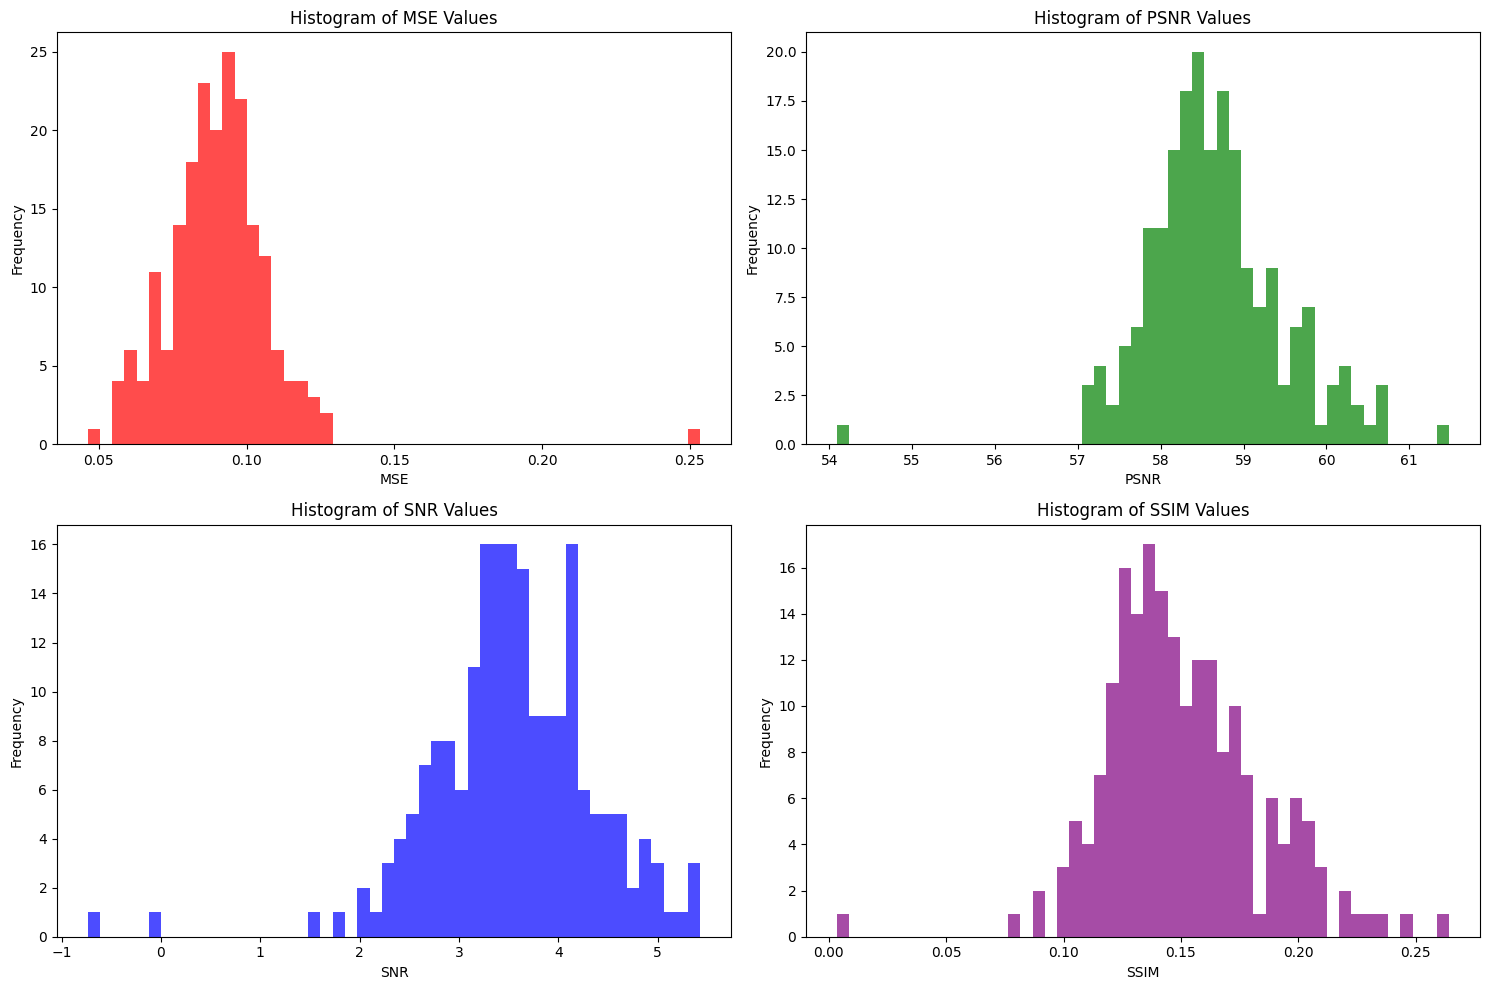

In [22]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=255.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0
    return image

# Placeholder paths to your images
original_image_paths = [f'/content/sample_data/Original/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 200)]

print("Number of original image paths:", len(original_image_paths))
print("Number of generated image paths:", len(generated_image_paths))
# Make sure both lists have the same number of paths
assert len(original_image_paths) == len(generated_image_paths) == 200

# Metric storage
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

# Process each image pair
for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    # Calculate metrics
    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Plot histograms of all metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# MSE Histogram
axs[0, 0].hist(mse_values, bins=50, color='red', alpha=0.7)
axs[0, 0].set_title('Histogram of MSE Values')
axs[0, 0].set_xlabel('MSE')
axs[0, 0].set_ylabel('Frequency')

# PSNR Histogram
axs[0, 1].hist(psnr_values, bins=50, color='green', alpha=0.7)
axs[0, 1].set_title('Histogram of PSNR Values')
axs[0, 1].set_xlabel('PSNR')
axs[0, 1].set_ylabel('Frequency')

# SNR Histogram
axs[1, 0].hist(snr_values, bins=50, color='blue', alpha=0.7)
axs[1, 0].set_title('Histogram of SNR Values')
axs[1, 0].set_xlabel('SNR')
axs[1, 0].set_ylabel('Frequency')

# SSIM Histogram
axs[1, 1].hist(ssim_values, bins=50, color='purple', alpha=0.7)
axs[1, 1].set_title('Histogram of SSIM Values')
axs[1, 1].set_xlabel('SSIM')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


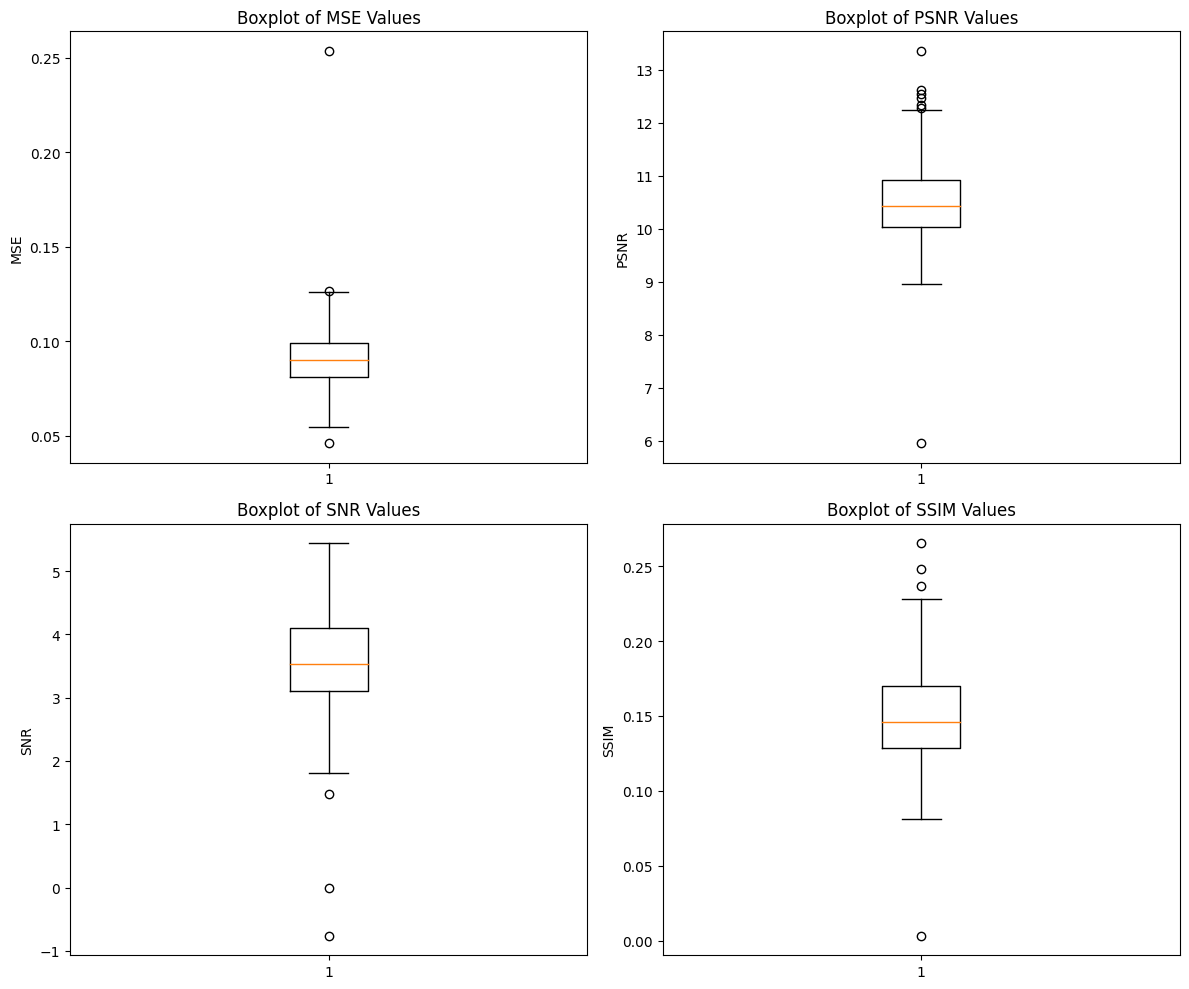

In [23]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.float32) / 255.0
    return image
    # Placeholder paths to your images
original_image_paths = [f'/content/sample_data/Original/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 200)]
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Create box plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].boxplot(mse_values)
axs[0, 0].set_title('Boxplot of MSE Values')
axs[0, 0].set_ylabel('MSE')

axs[0, 1].boxplot(psnr_values)
axs[0, 1].set_title('Boxplot of PSNR Values')
axs[0, 1].set_ylabel('PSNR')

axs[1, 0].boxplot(snr_values)
axs[1, 0].set_title('Boxplot of SNR Values')
axs[1, 0].set_ylabel('SNR')

axs[1, 1].boxplot(ssim_values)
axs[1, 1].set_title('Boxplot of SSIM Values')
axs[1, 1].set_ylabel('SSIM')

plt.tight_layout()
plt.show()

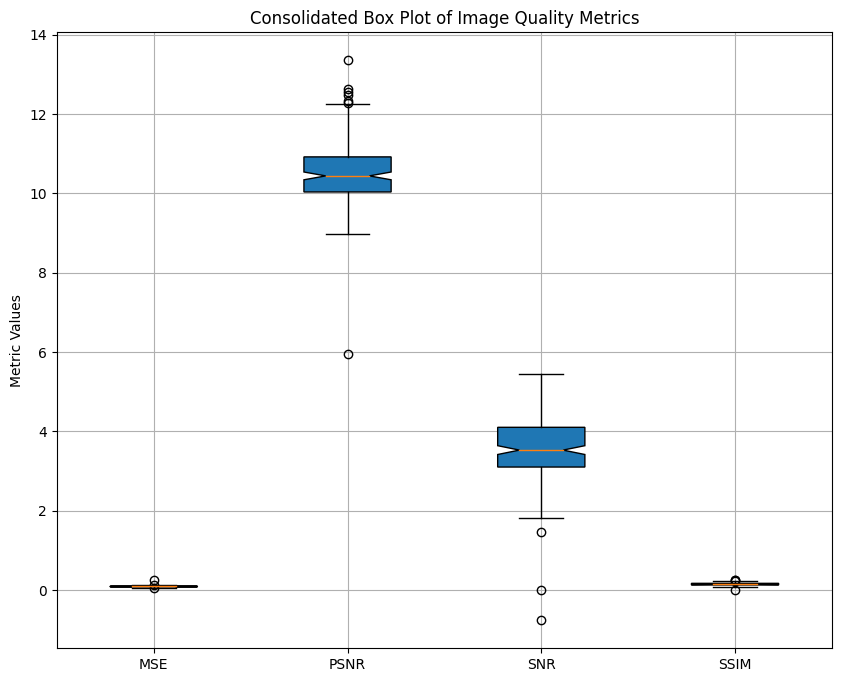

In [24]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.float32) / 255.0
    return image
original_image_paths = [f'/content/sample_data/Original/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 200)]
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Create a consolidated box plot
fig, ax = plt.subplots(figsize=(10, 8))
all_metrics = [mse_values, psnr_values, snr_values, ssim_values]
ax.boxplot(all_metrics, notch=True, patch_artist=True, labels=['MSE', 'PSNR', 'SNR', 'SSIM'])
ax.set_title('Consolidated Box Plot of Image Quality Metrics')
ax.set_ylabel('Metric Values')
plt.grid(True)
plt.show()

In [7]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import plotly.graph_objects as go

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(imageA, imageB, max_pixel=1.0):
    mse_value = calculate_mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.float32) / 255.0
    return image
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 200)]
mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original, generated))
    psnr_values.append(calculate_psnr(original, generated))
    snr_values.append(calculate_snr(original, generated))
    ssim_values.append(ssim(original, generated))

# Plotly Box Plot
fig = go.Figure()

fig.add_trace(go.Box(y=psnr_values, name='PSNR', marker_color='blue'))
fig.add_trace(go.Box(y=mse_values, name='MSE', marker_color='red'))
fig.add_trace(go.Box(y=snr_values, name='SNR', marker_color='green'))
fig.add_trace(go.Box(y=ssim_values, name='SSIM', marker_color='purple'))

fig.update_layout(
    title='Average Image Quality Metrics Values Across All Image Pairs',
    yaxis_title='Metric Values',
    boxmode='group',  # group together boxes of the different traces for each metric
    paper_bgcolor='rgba(0,0,0,0)',  # transparent background
    plot_bgcolor='rgba(0,0,0,0)'  # transparent background
)

fig.show()

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import plotly.graph_objects as go

def calculate_mse(imageA):
    return np.mean((imageA) ** 2)

def calculate_psnr(imageA,max_pixel=1.0):
    mse_value = calculate_mse(imageA)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def calculate_snr(original, noisy):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    image = cv2.resize(image, target_size)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = image.astype(np.float32) / 255.0
    return image

# Paths to images, adjust ranges if necessary to match file count
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
#generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]

mse_values, psnr_values, snr_values, ssim_values = [], [], [], []

for orig_path, gen_path in zip(original_image_paths, generated_image_paths):
    original = preprocess(orig_path)
    #generated = preprocess(gen_path)

    mse_values.append(calculate_mse(original))#, generated))
    psnr_values.append(calculate_psnr(original))#, generated))
    snr_values.append(calculate_snr(original))#, generated))
    ssim_values.append(ssim(original))#, generated))

# Calculate averages
average_metrics = {
    'PSNR': np.mean(psnr_values),
    'MSE': np.mean(mse_values),
    'SNR': np.mean(snr_values),
    'SSIM': np.mean(ssim_values)
}

# Create Plotly bar graph
fig = go.Figure(data=[
    go.Bar(
        x=list(average_metrics.keys()),
        y=list(average_metrics.values()),
        marker_color=['blueviolet', 'orange', 'lightblue', 'purple']
    )
])

fig.update_layout(
    title='Average Metrics Values Across All Image Pairs',
    xaxis_title='Metrics',
    yaxis_title='Average Values',
    paper_bgcolor='rgba(0,0,0,0)',  # transparent background
    plot_bgcolor='rgba(0,0,0,0)'  # transparent background
)

fig.show()


In [7]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import plotly.graph_objects as go

def calculate_mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

def calculate_psnr(mse, max_pixel=255.0):
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def calculate_snr(imageA, imageB):
    noise = imageA - imageB
    signal_power = np.sum(imageA ** 2)
    noise_power = np.sum(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)

def calculate_ssim(imageA, imageB):
    return compare_ssim(imageA, imageB)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0
    return image

# Replace with your actual file paths
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(1, 201)]

original_metrics = {'mse': [], 'psnr': [], 'snr': [], 'ssim': []}
generated_metrics = {'mse': [], 'psnr': [], 'snr': [], 'ssim': []}

for i in range(1, 201):
    original_path = f'/content/sample_data/Org/{i}.tif'
    generated_path = f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png'

    original_image = preprocess(original_path)
    generated_image = preprocess(generated_path)

    mse = calculate_mse(original_image, generated_image)
    ssim_value = calculate_ssim(original_image, generated_image)

    original_metrics['mse'].append(mse)
    original_metrics['psnr'].append(calculate_psnr(mse))
    original_metrics['snr'].append(calculate_snr(original_image, generated_image))
    original_metrics['ssim'].append(ssim_value)

    generated_metrics['mse'].append(mse)
    generated_metrics['psnr'].append(calculate_psnr(mse))
    generated_metrics['snr'].append(calculate_snr(generated_image, original_image))
    generated_metrics['ssim'].append(ssim_value)

# Create the bar graph with Plotly
fig = go.Figure()

for metric in original_metrics:
    fig.add_trace(go.Bar(
        name=f'Original {metric.upper()}',
        x=[metric.upper()],
        y=[np.mean(original_metrics[metric])],
        marker_color='blue'
    ))

for metric in generated_metrics:
    fig.add_trace(go.Bar(
        name=f'Generated {metric.upper()}',
        x=[metric.upper()],
        y=[np.mean(generated_metrics[metric])],
        marker_color='orange'
    ))

# Update the layout for a grouped bar chart
fig.update_layout(
    title='Average Metric Values for Original vs. Generated Images',
    xaxis_title='Metrics',
    yaxis_title='Average Values',
    barmode='group',
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
)

fig.show()



<ipython-input-7-d69f1e2d7cb5>:16: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(signal_power / noise_power)


In [8]:
import cv2
import numpy as np
import plotly.graph_objects as go
from skimage.measure import shannon_entropy

def calculate_standard_deviation(image):
    return np.std(image)

def calculate_entropy(image):
    # Normalize the pixel values to ensure the input range is suitable for entropy calculation
    normalized_image = image / image.max()
    return shannon_entropy(normalized_image)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    return image

# File paths
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]

# Initialize lists to store metrics
original_std_devs = []
original_entropies = []
generated_std_devs = []
generated_entropies = []

# Process and calculate metrics
for original_path, generated_path in zip(original_image_paths, generated_image_paths):
    original_image = preprocess(original_path)
    generated_image = preprocess(generated_path)

    # Calculate and append metrics
    original_std_devs.append(calculate_standard_deviation(original_image))
    original_entropies.append(calculate_entropy(original_image))
    generated_std_devs.append(calculate_standard_deviation(generated_image))
    generated_entropies.append(calculate_entropy(generated_image))

# Create bar graphs using Plotly
fig = go.Figure()

# Adding bars for original and generated metrics for standard deviation
fig.add_trace(go.Bar(name='Original Std Dev', x=list(range(1, 101)), y=original_std_devs, marker_color='blue'))
fig.add_trace(go.Bar(name='Generated Std Dev', x=list(range(1, 101)), y=generated_std_devs, marker_color='orange'))

# Adding bars for original and generated metrics for entropy
fig.add_trace(go.Bar(name='Original Entropy', x=list(range(1, 101)), y=original_entropies, marker_color='green'))
fig.add_trace(go.Bar(name='Generated Entropy', x=list(range(1, 101)), y=generated_entropies, marker_color='red'))

# Update the layout for a grouped bar chart
fig.update_layout(
    title='Metric Comparison for Original and Generated Images',
    xaxis=dict(title='Image Index', type='category'),
    yaxis=dict(title='Metric Values'),
    barmode='group',
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'  # Transparent background
)

fig.show()


<ipython-input-8-e9f5da20a0d8>:11: RuntimeWarning:

invalid value encountered in divide



In [2]:
import cv2
import numpy as np
import plotly.graph_objects as go
from skimage.measure import shannon_entropy

def calculate_standard_deviation(image):
    return np.std(image)

def calculate_entropy(image):
    # Normalize the pixel values to ensure the input range is suitable for entropy calculation
    normalized_image = image / image.max()
    return shannon_entropy(normalized_image)

def preprocess(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, target_size)
    return image

# File paths
# File paths
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]


# Initialize lists to store metrics
original_std_devs = []
original_entropies = []
generated_std_devs = []
generated_entropies = []

# Process and calculate metrics
for original_path, generated_path in zip(original_image_paths, generated_image_paths):
    original_image = preprocess(original_path)
    generated_image = preprocess(generated_path)

    # Calculate and append metrics
    original_std_devs.append(calculate_standard_deviation(original_image))
    original_entropies.append(calculate_entropy(original_image))
    generated_std_devs.append(calculate_standard_deviation(generated_image))
    generated_entropies.append(calculate_entropy(generated_image))

# Calculate average values for metrics
average_original_std = np.mean(original_std_devs)
average_original_entropy = np.mean(original_entropies)
average_generated_std = np.mean(generated_std_devs)
average_generated_entropy = np.mean(generated_entropies)

# Create bar graphs using Plotly
fig = go.Figure()

# Adding bars for average metrics
fig.add_trace(go.Bar(name='Original Std Dev', x=['Std Dev'], y=[average_original_std], marker_color='blue'))
fig.add_trace(go.Bar(name='Generated Std Dev', x=['Std Dev'], y=[average_generated_std], marker_color='orange'))

fig.add_trace(go.Bar(name='Original Entropy', x=['Entropy'], y=[average_original_entropy], marker_color='green'))
fig.add_trace(go.Bar(name='Generated Entropy', x=['Entropy'], y=[average_generated_entropy], marker_color='red'))

# Update the layout for a grouped bar chart
fig.update_layout(
    title='Average Metric Values for Original and Generated Images',
    xaxis=dict(title='Metrics', type='category'),
    yaxis=dict(title='Metric Values'),
    barmode='group',
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'  # Transparent background
)

fig.show()


<ipython-input-2-0c5200250032>:11: RuntimeWarning: invalid value encountered in divide
  normalized_image = image / image.max()


In [6]:
import numpy as np
import cv2
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import plotly.graph_objects as go

def preprocess(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    return image

def calculate_canny_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return np.sum(edges) / edges.size

def calculate_contrast(image):
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    epsilon = 1e-5  # Small constant to avoid division by zero
    return (max_intensity - min_intensity) / (max_intensity + min_intensity + epsilon)

def calculate_homogeneity(image):
    if image.dtype != np.uint8:
        image = (255 * image).astype(np.uint8)
    glcm = graycomatrix(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
    homogeneity = graycoprops(glcm, 'homogeneity')
    return np.mean(homogeneity)

def calculate_entropy(image):
    normalized_image = image / 255.0
    return shannon_entropy(normalized_image)

def calculate_standard_deviation(image):
    return np.std(image)

# File paths for demonstration purposes
original_image_paths = [f'/content/sample_data/Org/{i}.tif' for i in range(1, 201)]
generated_image_paths = [f'/content/sample_data/Generated/a-collection-of-Brachial-Plexus(BP)-nerves-in-the-ultrasound-imag-{i:05d}.png' for i in range(0, 201)]

# Metrics storage
metrics = {
    'edges': [],
    'contrast': [],
    'homogeneity': [],
    'entropy': [],
    'std_dev': []
}

# Calculate metrics for both original and generated images
for category, image_paths in zip(['Original', 'Generated'], [original_image_paths, generated_image_paths]):
    for path in image_paths:
        image = preprocess(path)
        metrics['edges'].append((category, calculate_canny_edges(image)))
        metrics['contrast'].append((category, calculate_contrast(image)))
        metrics['homogeneity'].append((category, calculate_homogeneity(image)))
        metrics['entropy'].append((category, calculate_entropy(image)))
        metrics['std_dev'].append((category, calculate_standard_deviation(image)))

# Create Plotly bar graphs for each metric
fig = go.Figure()
colors = ['blue', 'lightblue', 'orange', 'yellow', 'green', 'lightgreen', 'red', 'pink', 'purple', 'violet']  # Extended color list

for idx, (metric_name, values) in enumerate(metrics.items()):
    categories, data = zip(*values)
    original_mean = np.mean([d for c, d in values if c == 'Original'])
    generated_mean = np.mean([d for c, d in values if c == 'Generated'])
    fig.add_trace(go.Bar(name=f'{metric_name} - Original', x=[metric_name], y=[original_mean], marker_color=colors[idx * 2 % len(colors)]))
    fig.add_trace(go.Bar(name=f'{metric_name} - Generated', x=[metric_name], y=[generated_mean], marker_color=colors[(idx * 2 + 1) % len(colors)]))

fig.update_layout(
    title='Average Metric Values for Original and Generated Images',
    xaxis_title='Metrics',
    yaxis_title='Average Metric Values',
    barmode='group',
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent background
)

fig.show()
